In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the data
raw_data=pd.read_csv("milknew.csv")

In [4]:
raw_data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [5]:
print(raw_data.shape)

(1059, 8)


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [7]:
raw_data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

# BIVARIATE ANALYSIS

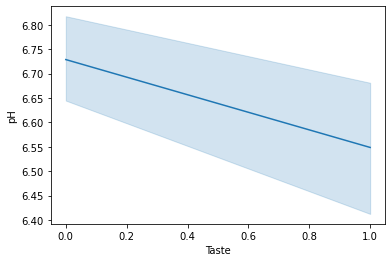

In [10]:
ax=sns.lineplot(x='Taste',y='pH',data=raw_data)

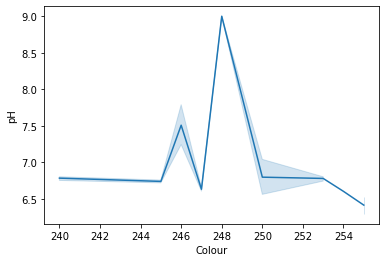

In [11]:
ax=sns.lineplot(x='Colour',y='pH',data=raw_data)

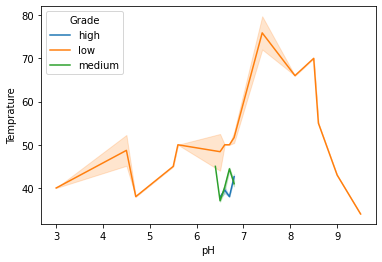

In [15]:
ax=sns.lineplot(x='pH',y='Temprature',hue='Grade',data=raw_data)

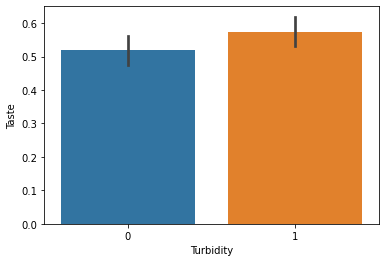

In [18]:
ax = sns.barplot(x="Turbidity",y="Taste",data=raw_data)

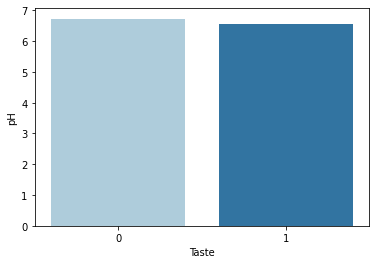

In [19]:
ax = sns.barplot(x="Taste",y="pH",data=raw_data,ci=None,palette="Paired")

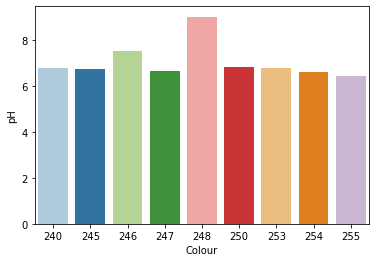

In [21]:
ax = sns.barplot(x="Colour",y="pH",data=raw_data,ci=None,palette="Paired")

<class 'numpy.ndarray'>


<AxesSubplot:ylabel='Density'>

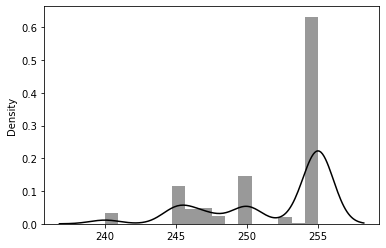

In [25]:
x=raw_data['Colour'].values
print(type(x))
sns.distplot(x,color='black')

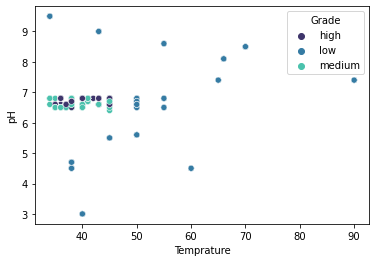

In [27]:
ax=sns.scatterplot(x="Temprature",y="pH",hue='Grade',data=raw_data,palette='mako')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='Colour', ylabel='pH'>

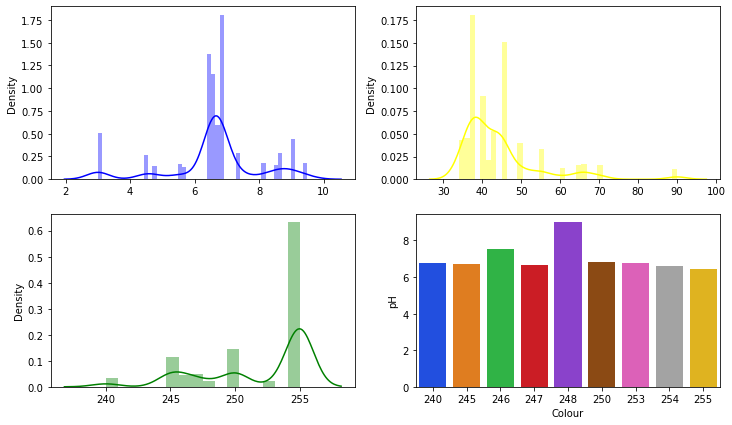

In [47]:
#Set up the matplotlib figure
fig,axes=plt.subplots(2,2,figsize=(12,7))

a=raw_data['pH'].values

b=raw_data['Temprature'].values
c=raw_data['Colour'].values

#plot1
sns.distplot(a,color='blue',ax=axes[0,0])
#plot2
sns.distplot(b,color='yellow',ax=axes[0,1])
#plot3
sns.distplot(c,color='green',ax=axes[1,0])
#plot4
sns.barplot(x="Colour",y="pH",data=raw_data,ci=None,palette='bright',ax=axes[1,1])


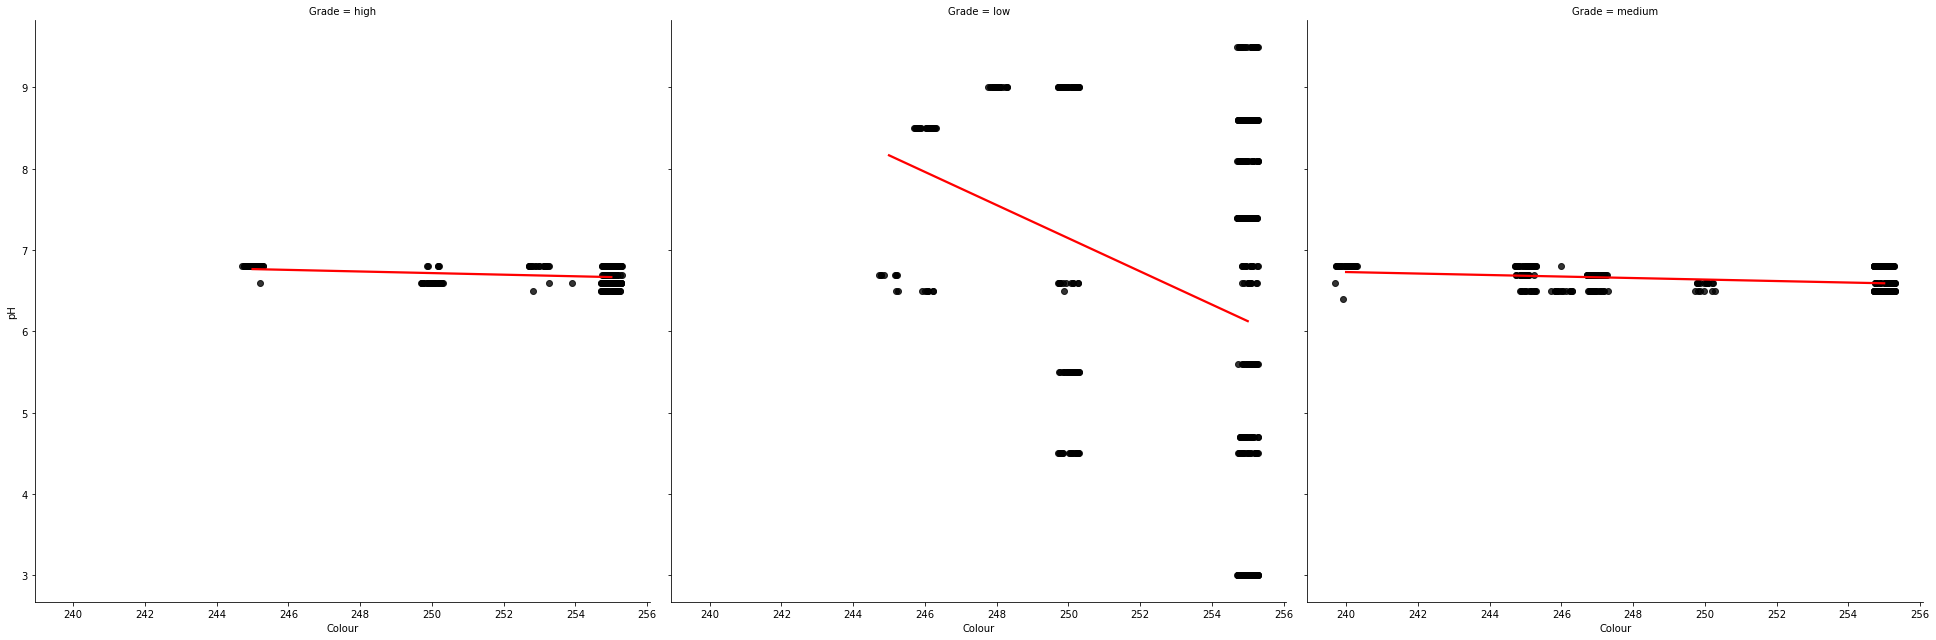

In [48]:
ax=sns.lmplot(x="Colour",y="pH",col="Grade",ci=None,data=raw_data,height=9,line_kws={'color':'red'},
              col_wrap=3,x_jitter=.3,
              scatter_kws={'color':'black'})

In [30]:
raw_data.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [31]:
X=raw_data[['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']]
y=raw_data['Grade']
print(X.shape)
print(y.shape)

(1059, 7)
(1059,)


In [32]:
#Scaling
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_scale = scale.fit_transform(X)
print(X_scale)
print(type(X_scale ))
print(X_scale.shape)

[[-0.02153136 -0.91410734  0.91050291 ...  0.69960809 -0.98221664
   0.5016002 ]
 [-0.02153136 -0.81503461 -1.09829413 ... -1.4293717   1.01810533
   0.26933321]
 [ 1.33656414  2.55343832  0.91050291 ...  0.69960809  1.01810533
  -1.35653574]
 ...
 [-2.59476494 -0.41874368  0.91050291 ...  0.69960809  1.01810533
   0.73386719]
 [ 0.12142606 -0.12152548  0.91050291 ...  0.69960809 -0.98221664
  -0.42746777]
 [ 1.40804285  1.06734732 -1.09829413 ...  0.69960809  1.01810533
   0.73386719]]
<class 'numpy.ndarray'>
(1059, 7)


In [49]:
#Split into test and train
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X_scale,y,test_size=0.2,random_state=1)

In [50]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(847, 7)
(847,)
(212, 7)
(212,)


In [51]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
print("LR:", accuracy_score(y_test,y_pred)*100)

LR: 86.79245283018868


In [53]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print(cm)


[[36  8  0]
 [ 6 83  3]
 [ 8  3 65]]


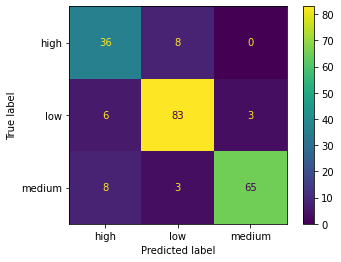

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
cmd.plot()

# KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

y_pred= knn.predict(X_test)

print(accuracy_score(y_test,y_pred)%100)

0.9764150943396226


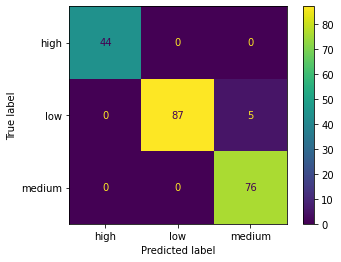

In [56]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=knn.classes_)

cmd.plot()

# NAIVE BAYES

In [57]:
from sklearn.naive_bayes import GaussianNB

nb= GaussianNB()
nb.fit(X_train,y_train)

y_pred=nb.predict(X_test)

print(accuracy_score(y_test,y_pred)%100)

0.9292452830188679


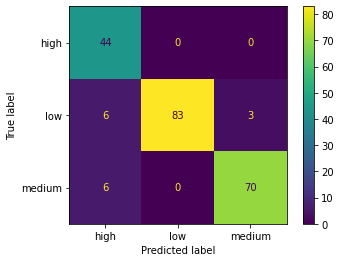

In [58]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=nb.classes_)

cmd.plot()

# DecisionTree

In [59]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

y_pred=dtree.predict(X_test)

print(accuracy_score(y_test,y_pred)%100)

1.0


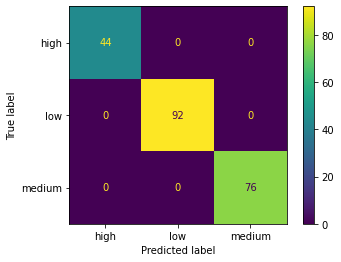

In [60]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=dtree.classes_)

cmd.plot()

# RandomForest

In [61]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

print(accuracy_score(y_test,y_pred))

1.0


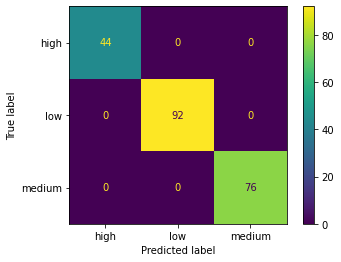

In [62]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=rfc.classes_)

cmd.plot()

In [63]:
from sklearn.ensemble import AdaBoostClassifier

model =AdaBoostClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print(accuracy_score(y_test,y_pred)%100)

0.9292452830188679


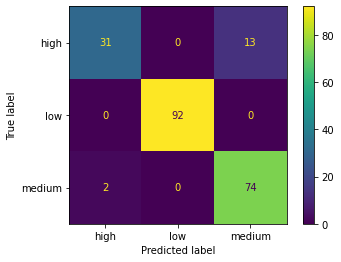

In [64]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=rfc.classes_)

cmd.plot()